<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.7 Artificial Neural Networks**


*   Mathematical formulation
*   Activation functions
* Cost function
* Backpropagation
* Backpropagation algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Mathematical formulation**

A general neural network receives input, attempts to learn about that input in order to produce output, adjusting the weighted associations according to the learning rule for improved accuracy along the way. This process is supervised learning.

Let $z_{j'}^{l}$ be the output of the network, this output for a given layer $l$ is equal to $Σw^{(l)}_{j,j'}a^{(l-1)}_{j}+b^{(l)}_{j'}$ for all $j$, where $b$ represents the bias.

# **Activation Functions**

The activation function of a node abstracts the output of that node for a given input or set of inputs. $σ$ is used to represent the activation functions, which is the same for all nodes in a layer:

$a^{(l)} = \sigma(z^{l}) = \sigma(W^{(l)}a^{(l-1)}+b^{(l)})$

Numerous activation functions are demonstrated below:

In [2]:
def stepFunction(z):
  if z >= 0:
    return 1
  else:
    return 0

def reluFunction(z):
  if z >= 0:
    return z
  else:
    return 0

def sigmoidFunction(z):
  return 1 / (1 + np.exp(-z))

def softmaxFunction(z):
  return np.exp(z) / np.sum(np.exp(z))

print(stepFunction(1))
print(reluFunction(1))
print(sigmoidFunction(1))
print(softmaxFunction(1))

1
1
0.7310585786300049
1.0


# **Cost Function**

Least squares is commonly used for a cost function. For a set of independent input data $y^n$ (training data) and correponding output data $̂y^n$, the cost function is:

$J = \frac{1}{2}\sum_{n=1}^{N}\sum_{K=1}^{K}(̂y^n_k-y^n_k)^2$

for *K* nodes.

In [3]:
def costFunction(y_hat, y):
  return 0.5 * np.sum((y_hat - y) ** 2)

print(costFunction(np.array([1, 2]), np.array([3, 4])))

4.0


# **Backpropagation and Backpropagation Algorithm**

Backpropagation is the process of adjusting the weights of the neural network based on the loss from the previous iteration. The goal is the minimize the cost function using gradient descent. The backpropagation algorithm is as follows:

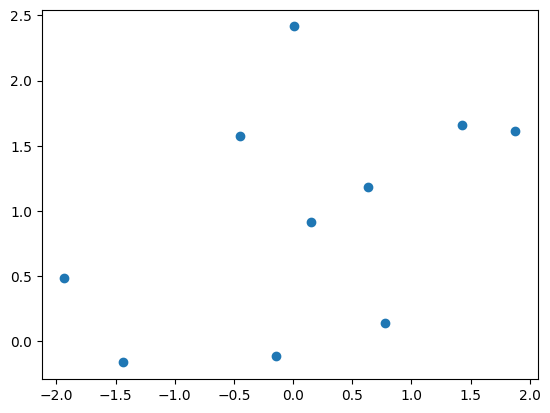

In [4]:
x = np.random.randn(10, 1)
y = np.random.randn(10, 1)
plt.scatter(x, y)
plt.show()

Initialize weights and biases, usually as random:

In [5]:
weights = np.random.randn(10, 10)
biases = np.random.randn(10, 1)

Next, pick input data and input the vector *x* into the network, computing the output $\hat y$:

In [6]:
for i in range(10):
  y_hat = np.dot(weights, x) + biases

For each iteration, update the parameters according to the loss:

In [7]:
for i in range(10):
  y_hat = np.dot(weights, x) + biases
  loss = y_hat - y
  weights -= loss * x
  biases -= loss

print("Loss: ", loss)
print("Weights: ", weights)
print("Biases: ", biases)

Loss:  [[ 4.84403895e-02]
 [-1.20900766e-03]
 [-4.84521845e+02]
 [ 0.00000000e+00]
 [ 1.93867419e+02]
 [ 2.11657191e+01]
 [ 3.98427957e-11]
 [ 4.97019798e-03]
 [-3.51360991e+01]
 [-4.78765161e-08]]
Weights:  [[-1.07834721e+00 -4.25114166e-02  8.41895970e-01  1.46624288e-01
   6.09209018e-01  2.34686144e-01  8.61466854e-01  5.02124860e-01
   1.74460466e-01  1.28489750e+00]
 [-2.69145940e+00 -1.11408818e+00 -3.67398785e+00 -1.08551647e+00
  -4.39529000e+00 -2.37170689e+00 -4.01092717e+00 -3.36772728e+00
  -2.98570181e+00 -4.51473830e+00]
 [-2.18702781e+03 -2.18647922e+03 -2.18354376e+03 -2.18622493e+03
  -2.18463633e+03 -2.18596925e+03 -2.18345098e+03 -2.18681675e+03
  -2.18511362e+03 -2.18418766e+03]
 [ 4.32243727e-01  7.99067161e-01  5.29960039e-01  9.15625096e-01
  -5.30511236e-01  7.46853036e-01 -7.70470993e-01  3.72131406e-01
   3.77495183e-01 -5.69849439e-01]
 [-2.27902289e+02 -2.27393193e+02 -2.27394671e+02 -2.26671533e+02
  -2.26827739e+02 -2.28592782e+02 -2.26765783e+02 -2.27587